In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")

from geopy.geocoders import Nominatim 
from geopy.distance import geodesic 

In [39]:
df = pd.read_csv("https://raw.githubusercontent.com/Daniil57Ibragimov/Project_Ibragimov-Lebedev/main/new_parameter/Project's_Data.txt", sep = ',')
df.head()

,Тип,Площадь,Этаж,Стоимость,Адрес
0,Студия,10 м²,1/3 эт.,1 049 000 ₽,"Москва, поселение Первомайское, деревня Иванов..."
1,Студия,10 м²,1/3 эт.,1 150 000 ₽,"Москва, поселение Первомайское, деревня Иванов..."
2,Апартаменты-студия,"11,7 м²",1/16 эт.,1 500 000 ₽,"Москва, Юго-Восточный административный округ, ..."
3,Апартаменты-студия,"15,3 м²",1/16 эт.,1 590 000 ₽,"Москва, Волжский бульвар, 19"
4,Апартаменты-студия,13 м²,1/3 эт.,1 650 000 ₽,"Москва, посёлок Первомайское, Центральная улиц..."


Всё, теперь мы окончательно не зависим от сайта, можно смело влепить им диз и юзать Циан. 

В последующих шагах мы причёсываем данные, приводим значения в правильный читаемый формат. Может возникнуть вопрос лишь по одному решению:
    
Все цены, которые не имеют точного значения, то есть записаны в формате: "От X рублей" мы удаляем и придаём им ближайшие предыдущие значения. Почему так? 
    
Ну, данных форматов достаточно много и просто не принимать их во внимание нельзя. Поскольку цена не задана точно, возникает вопрос, какое значение ей придавать. Наше решение брать минимальную возможную сумму достаточно логично и просто, и скорее всего применимо в реальной жизни. Вряд ли, откликаясь на объявление "Продаётся студия от 5 млн." человек рассматривает вариант, что отдаст 10 или хотя бы 6. Второй вопрос, а нормально ли придавать значения предыдущих значений? Да, вполне, потому что в силу плотности данных, максимальная разница может быть, ну, от силы, 50 тысяч, хотя в большинстве случаев её вообще нет. Эта сумма абсолютно некритична и не исказит результаты, так как почти люой продавец уступит 0,5% стоимости.

In [3]:
df = df.replace('от ', np.nan)
df

,Тип,Площадь,Этаж,Стоимость,Адрес
0,Студия,10 м²,1/3 эт.,1 049 000 ₽,"Москва, поселение Первомайское, деревня Иванов..."
1,Студия,10 м²,1/3 эт.,1 150 000 ₽,"Москва, поселение Первомайское, деревня Иванов..."
2,Апартаменты-студия,"11,7 м²",1/16 эт.,1 500 000 ₽,"Москва, Юго-Восточный административный округ, ..."
3,Апартаменты-студия,"15,3 м²",1/16 эт.,1 590 000 ₽,"Москва, Волжский бульвар, 19"
4,Апартаменты-студия,13 м²,1/3 эт.,1 650 000 ₽,"Москва, посёлок Первомайское, Центральная улиц..."
...,...,...,...,...,...
30795,3-комн. квартира,"59,7 м²",1/5 эт.,20 000 000 ₽,"Москва, Ботаническая улица, 5"
30796,2-комн. квартира,"60,8 м²",4/22 эт.,20 000 000 ₽,"Москва, 3-я Хорошёвская улица, 17А"
30797,2-комн. квартира,52 м²,13/17 эт.,20 000 000 ₽,"Москва, улица Борисовские Пруды, 13к1"
30798,3-комн. квартира,"78,5 м²",7/13 эт.,20 000 000 ₽,"Москва, Южнобутовская улица, 71"


In [4]:
df['Стоимость'] = df['Стоимость'].fillna(method='ffill')

df.rename(columns={'Площадь': 'Площадь, м²', 'Стоимость': 'Стоимость, ₽', 'Этаж': 'Номер этажа'}, inplace=True)

df

,Тип,"Площадь, м²",Номер этажа,"Стоимость, ₽",Адрес
0,Студия,10 м²,1/3 эт.,1 049 000 ₽,"Москва, поселение Первомайское, деревня Иванов..."
1,Студия,10 м²,1/3 эт.,1 150 000 ₽,"Москва, поселение Первомайское, деревня Иванов..."
2,Апартаменты-студия,"11,7 м²",1/16 эт.,1 500 000 ₽,"Москва, Юго-Восточный административный округ, ..."
3,Апартаменты-студия,"15,3 м²",1/16 эт.,1 590 000 ₽,"Москва, Волжский бульвар, 19"
4,Апартаменты-студия,13 м²,1/3 эт.,1 650 000 ₽,"Москва, посёлок Первомайское, Центральная улиц..."
...,...,...,...,...,...
30795,3-комн. квартира,"59,7 м²",1/5 эт.,20 000 000 ₽,"Москва, Ботаническая улица, 5"
30796,2-комн. квартира,"60,8 м²",4/22 эт.,20 000 000 ₽,"Москва, 3-я Хорошёвская улица, 17А"
30797,2-комн. квартира,52 м²,13/17 эт.,20 000 000 ₽,"Москва, улица Борисовские Пруды, 13к1"
30798,3-комн. квартира,"78,5 м²",7/13 эт.,20 000 000 ₽,"Москва, Южнобутовская улица, 71"


In [5]:
df['Количество этажей'] = df['Номер этажа'] 

for i in range(df.shape[0]):
    
    df['Стоимость, ₽'][i] = int(df['Стоимость, ₽'][i][:-2].replace(' ', ''))
    df['Площадь, м²'][i] = float(df['Площадь, м²'][i][:-3].replace(',', '.'))
    df['Количество этажей'][i] = int(df['Количество этажей'][i][:-4].split('/')[1])
    
    if '-' not in df['Номер этажа'][i]:
        df['Номер этажа'][i] = int(df['Номер этажа'][i][:-4].split('/')[0])
    else:
        df['Номер этажа'][i] = int(df['Номер этажа'][i][:-4].split('/')[0].split('-')[1])
    
df

,Тип,"Площадь, м²",Номер этажа,"Стоимость, ₽",Адрес,Количество этажей
0,Студия,10.0,1,1049000,"Москва, поселение Первомайское, деревня Иванов...",3
1,Студия,10.0,1,1150000,"Москва, поселение Первомайское, деревня Иванов...",3
2,Апартаменты-студия,11.7,1,1500000,"Москва, Юго-Восточный административный округ, ...",16
3,Апартаменты-студия,15.3,1,1590000,"Москва, Волжский бульвар, 19",16
4,Апартаменты-студия,13.0,1,1650000,"Москва, посёлок Первомайское, Центральная улиц...",3
...,...,...,...,...,...,...
30795,3-комн. квартира,59.7,1,20000000,"Москва, Ботаническая улица, 5",5
30796,2-комн. квартира,60.8,4,20000000,"Москва, 3-я Хорошёвская улица, 17А",22
30797,2-комн. квартира,52.0,13,20000000,"Москва, улица Борисовские Пруды, 13к1",17
30798,3-комн. квартира,78.5,7,20000000,"Москва, Южнобутовская улица, 71",13


In [6]:
df['Стоимость, ₽'] = df['Стоимость, ₽'].astype(int)
df['Площадь, м²'] = df['Площадь, м²'].astype(float)

df['Стоимость м², ₽/м²'] = df['Стоимость, ₽'] / df['Площадь, м²']
df['Стоимость м², ₽/м²'] = df['Стоимость м², ₽/м²'].round()

df

,Тип,"Площадь, м²",Номер этажа,"Стоимость, ₽",Адрес,Количество этажей,"Стоимость м², ₽/м²"
0,Студия,10.0,1,1049000,"Москва, поселение Первомайское, деревня Иванов...",3,104900.0
1,Студия,10.0,1,1150000,"Москва, поселение Первомайское, деревня Иванов...",3,115000.0
2,Апартаменты-студия,11.7,1,1500000,"Москва, Юго-Восточный административный округ, ...",16,128205.0
3,Апартаменты-студия,15.3,1,1590000,"Москва, Волжский бульвар, 19",16,103922.0
4,Апартаменты-студия,13.0,1,1650000,"Москва, посёлок Первомайское, Центральная улиц...",3,126923.0
...,...,...,...,...,...,...,...
30795,3-комн. квартира,59.7,1,20000000,"Москва, Ботаническая улица, 5",5,335008.0
30796,2-комн. квартира,60.8,4,20000000,"Москва, 3-я Хорошёвская улица, 17А",22,328947.0
30797,2-комн. квартира,52.0,13,20000000,"Москва, улица Борисовские Пруды, 13к1",17,384615.0
30798,3-комн. квартира,78.5,7,20000000,"Москва, Южнобутовская улица, 71",13,254777.0


In [7]:
if df.isnull().sum().sum() == 0:
    print('Пропусков нет')
else:
    print('Пропуски есть')


Пропусков нет


In [8]:
a = list(df['Адрес'])

In [9]:
a.sort()

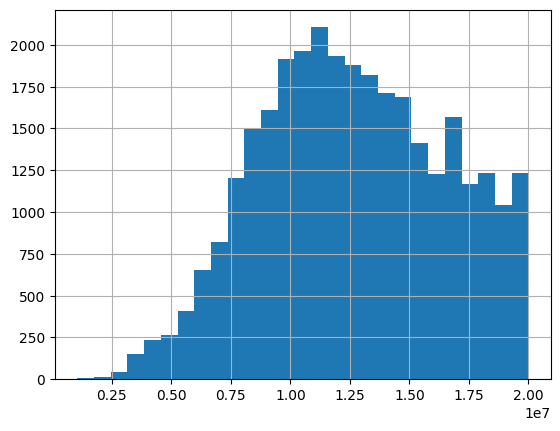

In [10]:
df['Стоимость, ₽'].hist(bins=27)
plt.show()

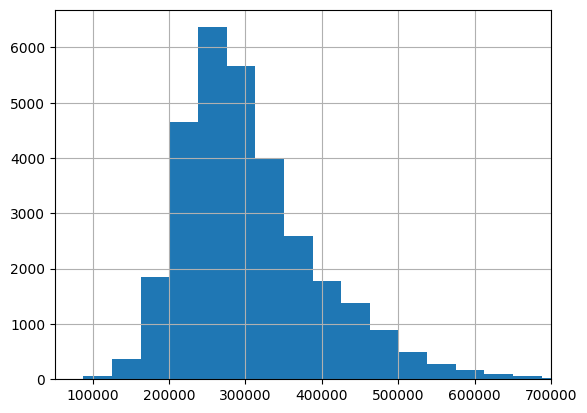

In [11]:
price_per_meter =  df['Стоимость, ₽']/df['Площадь, м²']
plt.xlim(price_per_meter.min(), 700000)
price_per_meter.hist(bins=27)
plt.show()

In [12]:
var_cat = df.select_dtypes(include=['object']).columns.tolist()

In [13]:
var_cat = ['Номер этажа', 'Тип', 'Количество этажей']

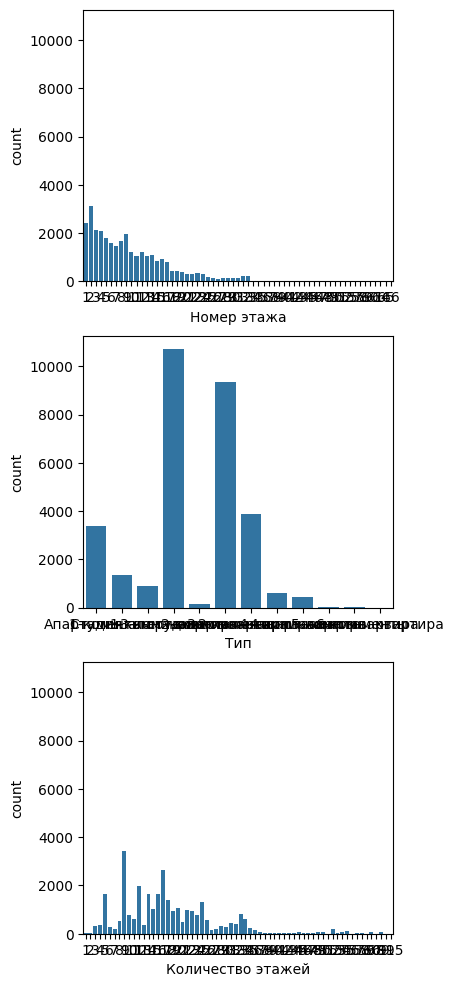

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(4, 12), sharey=True)

for i in range(len(var_cat)):
    sns.countplot(x=var_cat[i], data=df, ax=axes[i % 3])

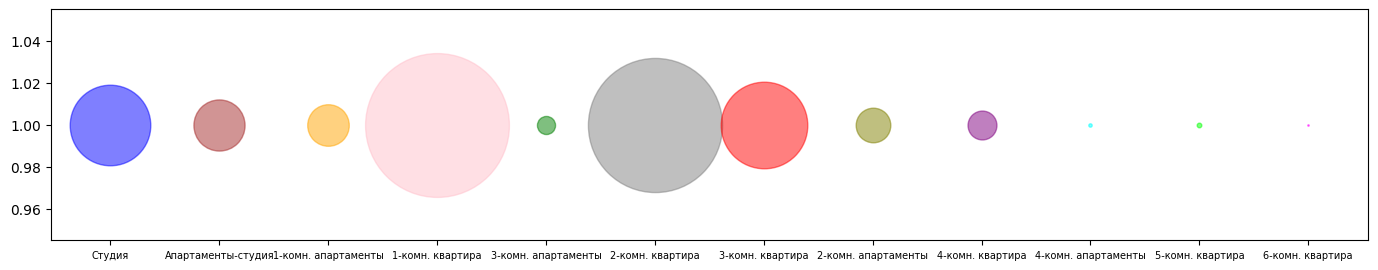

In [36]:
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(3)
types=list(df['Тип'].unique())

colors = dict(zip(types,['blue','brown','orange','pink','green','gray','red','olive','purple','cyan', 'lime','magenta']))

sizes = df.groupby('Тип').agg('count')
sizes = sizes.to_dict()
sizes = sizes['Площадь, м²']

for i,y in enumerate(types):
    plt.scatter(i, 1, c=colors[y], alpha=0.5, label=str(y), s=sizes[y])

plt.xticks(ticks=list(range(len(types))) , labels=types, size=7)
plt.show()

In [78]:
geolocator = Nominatim(user_agent="Tester") #Указываем название приложения
address_1 = str(df['Адрес'][3]) #Получаем название первого города
location_1 = geolocator.geocode(address_1) #Получаем полное название первого города
print('Координаты: ', location_1.latitude, location_1.longitude) #Выводим координаты первого города

Координаты:  55.7069808 37.74896238702475
